# **Deep learning entry task**
 <img src="https://www.tu-braunschweig.de/typo3conf/ext/tu_braunschweig/Resources/Public/Images/Logos/tu_braunschweig_logo.svg" align="right" width="200px"/>

[Institute of Geodesy and Photogrammetry](https://www.tu-braunschweig.de/en/igp),  
[The Technical University of Braunschweig  ](https://www.tu-braunschweig.de/en/)  
Instructors: [Dr. -Ing. Mehdi Maboudi](https://www.tu-braunschweig.de/en/igp/staff/mehdi-maboudi) and [Dr. Pedro Achanccaray](https://www.tu-braunschweig.de/en/igp/staff/pedro-diaz)
<br clear="left"/>

The purpose of this entry task is to measure your **knowledge of machine learning and artificial neural network concepts**. You should be familiar with these topics for **better understanding and comprehension** of the deep learning course.


For this reason, the entry task should be solved **without using any artificial intelligence tools** (ChatGPT, Copilot, among others). You can only use them to assist you in **debugging** your code.

# **1. Import all necessary packages**

In [1]:
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
import matplotlib.image as mpimg
from PIL import Image
from sklearn.metrics import confusion_matrix
import seaborn as sn
from keras.callbacks import ModelCheckpoint
!pip install scikeras
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV


# **2. Load the Fashion MNIST dataset for image classification**

- Load the Fashion MNIST dataset.
- Create three disjoint sets: train, validation and test (you can use any proportions for these sets).

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape, "y_test shape:", y_test.shape)

x_train shape: (60000, 28, 28) y_train shape: (60000,)
x_test shape: (10000, 28, 28) y_test shape: (10000,)


In [3]:
x_train = x_train.reshape(x_train.shape[0], 784)
x_test = x_test.reshape(x_test.shape[0], 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

print("Training matrix shape", x_train.shape)
print("Testing matrix shape", x_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [4]:
x_train /= 255
x_test /= 255

In [5]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices using one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [6]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [7]:
# Split training data into train / validation sets (5000 validation / remaining 55,000 for training)
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

In [8]:
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)
print("x_valid shape:", x_valid.shape, "y_valid shape:", y_valid.shape)
print("x_test shape:", x_test.shape, "y_test shape:", y_test.shape)

x_train shape: (55000, 784) y_train shape: (55000, 10)
x_valid shape: (5000, 784) y_valid shape: (5000, 10)
x_test shape: (10000, 784) y_test shape: (10000, 10)


In your own words, describe the purpose of each set:
- _train_:The training set is the set of data used to train the model. It comprises a large portion of the available data and is the basis for model parameter estimation.
- _validation_: The validation set is an intermediary between the training and test sets. Its primary purpose is to fine-tune the model's hyperparameters and assess its performance during training.
- _test_: The test set is a separate subset of the data withheld during the training phase. It is an unbiased benchmark to evaluate the model's performance after training. The test set simulates real-world data that the model is likely to encounter in production.

# **3. Create a Multi Layer Perceptron (MLP) for image classification**


Feel free to use any configuration (number of hidden layers, number of neurons per layer) and framework (Scikit learn, Keras, TensorFlow, PyTorch, etc.)

In [9]:
def create_model(optimi_zer="Adam"):
  global model
  model = Sequential()
  model.add(Dense(256, input_dim=(784), activation='relu'))
  model.add(Dense(256, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(256, activation='relu'))
  #model.add(Dropout(0.2))
  model.add(Dense(256, activation='relu'))
  model.add(Dense(10, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer=optimi_zer, metrics=['accuracy'])
  return model

# **4. Train the model**

Train the model and perform a hyperparameter tuning to find the best learning rate from a set of learning rates (1D grid search).

In [10]:
keras_model = KerasClassifier(build_fn=create_model(), verbose=0)
learn_rate = [0.0001,0.001, 0.01, 0.5]
param_grid = dict(optimizer__learning_rate=learn_rate)
grid = GridSearchCV(estimator=keras_model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.854727 using {'optimizer__learning_rate': 0.001}
0.849382 (0.004092) with: {'optimizer__learning_rate': 0.0001}
0.854727 (0.007052) with: {'optimizer__learning_rate': 0.001}
0.852800 (0.006364) with: {'optimizer__learning_rate': 0.01}
0.850182 (0.004936) with: {'optimizer__learning_rate': 0.5}


In [11]:
print(grid_result.best_params_)
best_learning_rate=grid_result.best_params_.get("optimizer__learning_rate")
best_learning_rate

{'optimizer__learning_rate': 0.001}


0.001

In [12]:
print(best_learning_rate)

0.001


In [13]:
final_optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=best_learning_rate)

model = create_model(optimi_zer=final_optimizer)

checkpointer = ModelCheckpoint(filepath='model_best_weights.hdf5', verbose = 1, save_best_only=True)
history = model.fit(x_train,
         y_train,
         batch_size=32,
         epochs=10,
         validation_data=(x_valid, y_valid),
         callbacks=[checkpointer])

Epoch 1/10
1717/1719 [============================>.] - ETA: 0s - loss: 0.4814 - accuracy: 0.8280
Epoch 1: val_loss improved from inf to 0.37634, saving model to model_best_weights.hdf5
1719/1719 [==============================] - 14s 8ms/step - loss: 0.4813 - accuracy: 0.8280 - val_loss: 0.3763 - val_accuracy: 0.8658
Epoch 2/10
1713/1719 [============================>.] - ETA: 0s - loss: 0.3734 - accuracy: 0.8650
Epoch 2: val_loss improved from 0.37634 to 0.33668, saving model to model_best_weights.hdf5
1719/1719 [==============================] - 14s 8ms/step - loss: 0.3736 - accuracy: 0.8649 - val_loss: 0.3367 - val_accuracy: 0.8820
Epoch 3/10
1714/1719 [============================>.] - ETA: 0s - loss: 0.3323 - accuracy: 0.8790
Epoch 3: val_loss improved from 0.33668 to 0.31537, saving model to model_best_weights.hdf5
1719/1719 [==============================] - 14s 8ms/step - loss: 0.3322 - accuracy: 0.8791 - val_loss: 0.3154 - val_accuracy: 0.8852
Epoch 4/10
1714/1719 [==========

# **5. Plots**

Plot the evolution of the Loss function and Accuracy values over the epochs (for train and validation sets) during training the best model.

- What can you infere from the training curves of the model?
- Is there over- or underfitting?

Text(0.5, 0, '# of epochs')

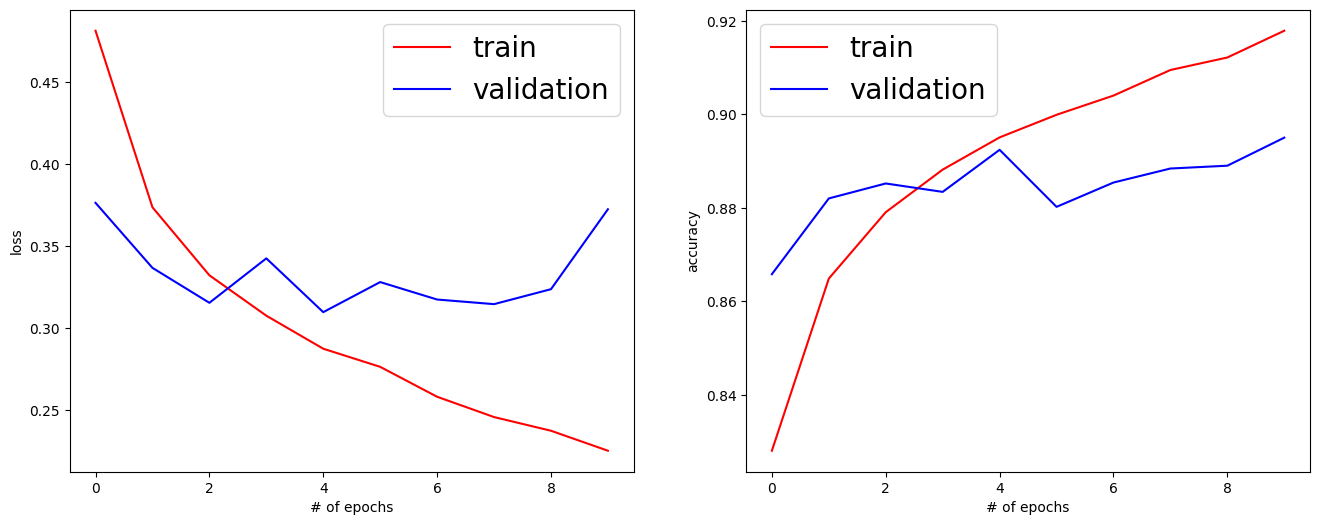

In [14]:
# Plot loss and accuracy while training process
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
nepochs=len(history.history['loss'])
plt.plot(range(nepochs), history.history['loss'],     'r-', label='train')
plt.plot(range(nepochs), history.history['val_loss'], 'b-', label='validation')
plt.legend(prop={'size': 20})
plt.ylabel('loss')
plt.xlabel('# of epochs')
plt.subplot(1,2,2)
plt.plot(range(nepochs), history.history['accuracy'], 'r-', label='train')
plt.plot(range(nepochs), history.history['val_accuracy'], 'b-', label='validation')
plt.legend(prop={'size': 20})
plt.ylabel('accuracy')
plt.xlabel('# of epochs')

1. From there training curves, I can clearly make out that the model performs training well till 5th Epoch but after the 5th Epoch it starts overfit since training accuracy exceeds the validation  accuracy or validation loss is higher then training loss.

2. Yes, there is overfitting. When I trained the model till 30th Epoch it is clear case of overfit seen in graph but then I trained it till 10th Epoch only using Early stopping to avoid over fit it.

# **6. Run inference**

Run inference in the test set and compute the metrics for testing.

In [15]:
model.load_weights('model_best_weights.hdf5')

# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=1)

313/313 [==============================] - 1s 3ms/step - loss: 0.3501 - accuracy: 0.8770


In [16]:
score
# Loss and accuracy of model on test dataset

[0.350115031003952, 0.8769999742507935]

313/313 [==============================] - 1s 3ms/step


<Axes: >

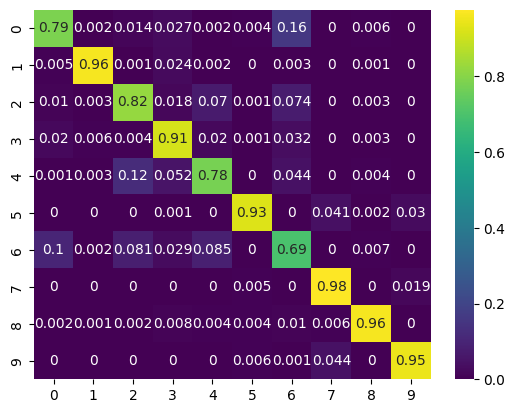

In [17]:
# Plotting the confusion matrix
y_pred_softmax = model.predict(x_test)
y_pred_cf = np.int32([np.argmax(r) for r in y_pred_softmax])
y_test_cf = np.int32([np.argmax(r) for r in y_test])


cm = confusion_matrix(y_test_cf, y_pred_cf)
cm = cm / cm.sum(axis=1)
sn.heatmap(cm, annot=True, cmap='viridis')

# **7. Test samples**

Show some samples from the test set. Use the following layout: input image, reference class and predicted class.

In [18]:
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2
                        "Dress",        # index 3
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6
                        "Sneaker",      # index 7
                        "Bag",          # index 8
                        "Ankle boot"]   # index 9

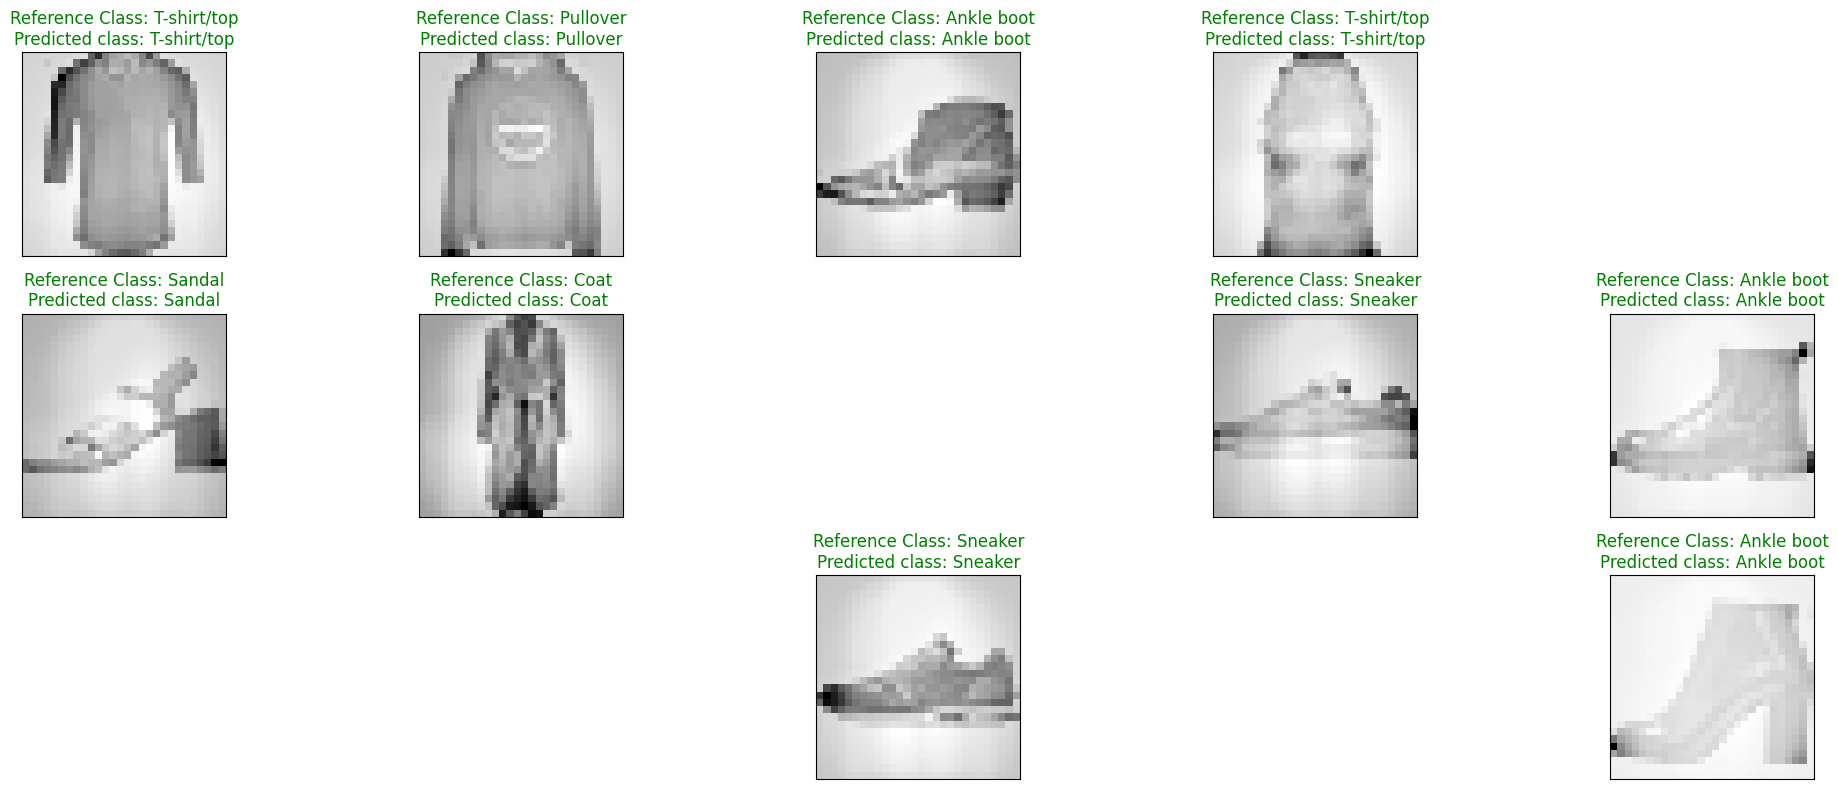

In [50]:
# Some example where neural network predicted correctly
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    predict_index = y_pred_cf[index]
    true_index = y_test_cf[index]
    if predict_index == true_index:
      ax = figure.add_subplot(3, 5, i+1 , xticks=[], yticks=[])
      ax.imshow(np.squeeze(x_test[index].reshape(28,28)), cmap='Greys')
      ax.set_title("Reference Class: {}\nPredicted class: {}".format(fashion_mnist_labels[true_index],
                                                          fashion_mnist_labels[predict_index]),
                 color=("green" if predict_index == true_index else "red"))
plt.tight_layout()

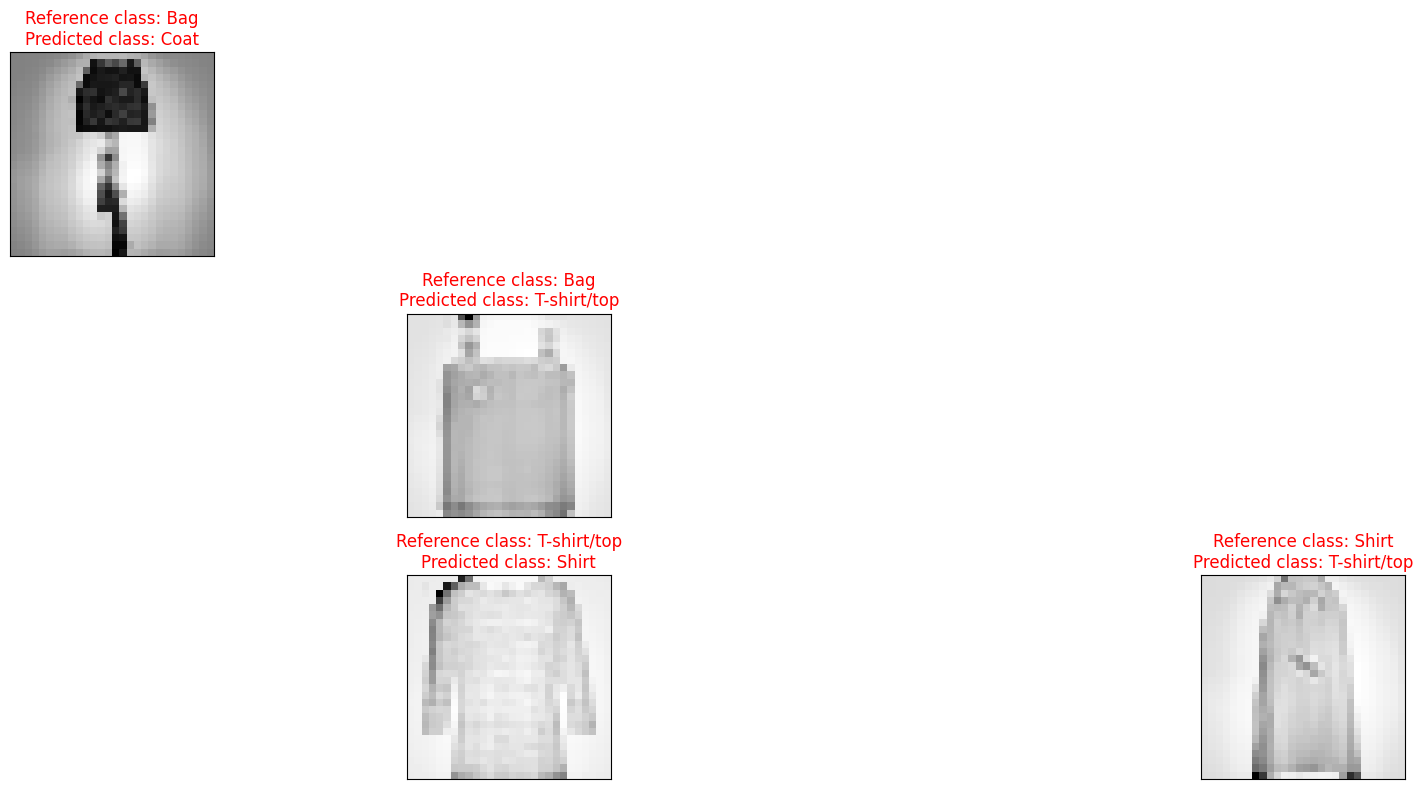

In [49]:
# Some example where neural network did not predicted correctly
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    predict_index = y_pred_cf[index]
    true_index = y_test_cf[index]
    if predict_index != true_index:
      ax = figure.add_subplot(3, 5, i+1 , xticks=[], yticks=[])
      ax.imshow(np.squeeze(x_test[index].reshape(28,28)), cmap='Greys')
      ax.set_title("Reference class: {}\nPredicted class: {}".format(fashion_mnist_labels[true_index],
                                                          fashion_mnist_labels[predict_index]),
                 color=("green" if predict_index == true_index else "red"))
      plt.tight_layout()

# **8. Testing with new images**


Test the model with at least two images (from internet or take a photo with your phone or camera).

Do not forget to convert the image to the Fashion MNIST format: grayscale, $28\times 28$, apply normalization, etc.

Comment the results.

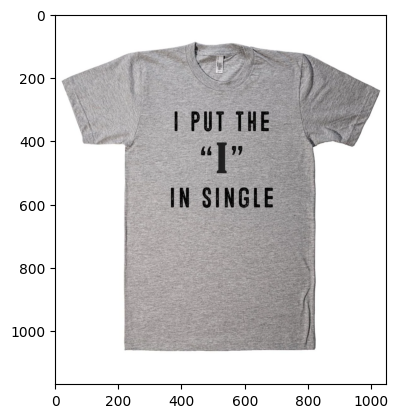

In [63]:
# Read Images
img = mpimg.imread('tshirt.webp')

# Output Images
plt.imshow(img)

In [64]:
img.shape

(1169, 1048, 3)

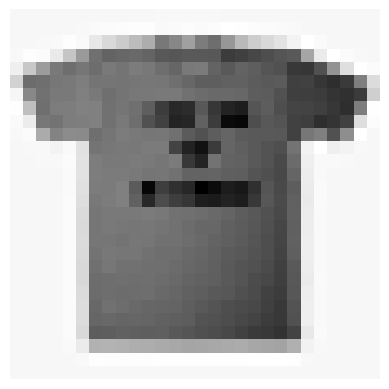

In [65]:
def rgb_to_gray(rgb_img):
    """
    Convert RGB image to grayscale.
    """
    return np.dot(rgb_img[...,:3], [0.2989, 0.5870, 0.1140])

def resize_image(img, target_shape):
    """
    Resize the image to the target shape.
    """
    return np.array(Image.fromarray(img).resize((target_shape[1], target_shape[0])))


rgb_image = plt.imread("tshirt.webp")

# Convert RGB image to grayscale
gray_image = rgb_to_gray(rgb_image)

# Resize grayscale image to the desired shape
target_shape = (28, 28)
resized_image = resize_image(gray_image, target_shape)

# Normalize the image
resized_image = resized_image.astype('float32') / 255.0

# Expand dimensions to match the shape (28, 28, 1)
resized_image = np.expand_dims(resized_image, axis=-1)

# Display the resized grayscale image
plt.imshow(resized_image, cmap='gray')
plt.axis('off')
plt.show()


In [66]:
resized_image=resized_image.reshape(1,784)
resized_image = scaler.transform(resized_image)
resized_image.shape

(1, 784)

In [67]:
predict=model.predict(resized_image)
y_pred=np.argmax(predict,axis=1)
y_pred

1/1 [==============================] - 0s 18ms/step


array([6])

In [68]:
fashion_mnist_labels[int(y_pred)]   # Wrong Prediction but we can say it was almost correct it predicted shirt instead of tshirt.

'Shirt'

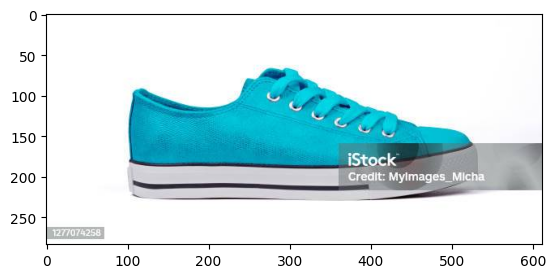

In [77]:
# Read Images
img = mpimg.imread('shoes.jpg')

# Output Images
plt.imshow(img)

In [78]:
img.shape

(284, 612, 3)

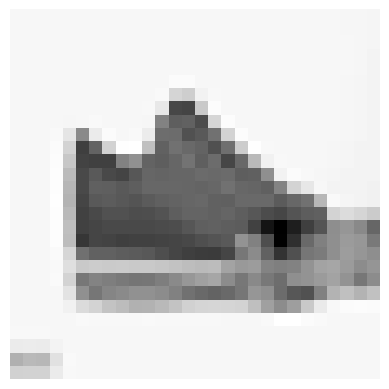

In [79]:

rgb_image = plt.imread("shoes.jpg")

# Convert RGB image to grayscale
gray_image = rgb_to_gray(rgb_image)

# Resize grayscale image to the desired shape
target_shape = (28, 28)
resized_image = resize_image(gray_image, target_shape)

# Normalize the image
resized_image = resized_image.astype('float32') / 255.0

# Expand dimensions to match the shape (28, 28, 1)
resized_image = np.expand_dims(resized_image, axis=-1)

# Display the resized grayscale image
plt.imshow(resized_image, cmap='gray')
plt.axis('off')
plt.show()


In [80]:
resized_image=resized_image.reshape(1,784)
resized_image = scaler.transform(resized_image)
resized_image.shape

(1, 784)

In [81]:
predict=model.predict(resized_image)
y_pred=np.argmax(predict,axis=1)
y_pred

1/1 [==============================] - 0s 30ms/step


array([6])

In [82]:
fashion_mnist_labels[int(y_pred)]   # Wrong Prediction by the model it predicted shoes as shirt. Model need to be generalised more.

'Shirt'

# **9. How could we improve the trained model?**

Share your ideas and comments to further improve the results.

We can improve this model by using
1. Data Augmentation-  We can roatate the images and increase the training data more so that model can learn better on different aspects of images in order to be generalise and perform better on unseen test data.
2. Using Approroate Dropouts, since the model is overfitted we can use the propoer dropout layers to remove the neurons in order to avoid overfitting.
3. Early stopping - When I trained the model till 30 Epochs it was clearly showing overfit through graph, thats why I stopped the training at 10th Epoch. Hence Early stopping can be used to improve the model.